In [236]:
import os
import matplotlib.pyplot as plot
# import cv2
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.metrics import confusion_matrix as CM
# from random import randint
# from IPython.display import SVG
import matplotlib.gridspec as gridspec
import matplotlib.image as img
import matplotlib.pyplot as plt
import re
from pathlib import Path
import pandas as pd
import seaborn as sn

from scipy.io.wavfile import read

In [293]:
directory = "/home/supriya/Documents/Assignment/MLSP/Data/emotion_classification/train"

In [18]:
pattern = re.compile(r'(\w*).(\w*)')
for images in os.listdir(directory):
    ex = pattern.search(images)
    # label = []
    # if(ex.group(2) == 'happy'):
    print(f'{ex.group(1)} : {ex.group(2)}')



subject12 : sad
subject01 : happy
subject06 : sad
subject03 : sad
subject05 : sad
subject07 : happy
subject02 : sad
subject13 : happy
subject09 : happy
subject10 : sad
subject07 : sad
subject06 : happy
subject13 : sad
subject12 : happy
subject11 : sad
subject09 : sad
subject02 : happy
subject04 : sad
subject04 : happy
subject10 : happy


In [294]:
pattern = re.compile(r'(\w*).(\w*)')
def emotion_extract(image):
    ex = pattern.search(image)
    if(ex.group(2) == 'happy'):
        return 1
    return 0

    # print(f'{ex.group(1)} : {ex.group(2)}')

In [25]:
i = img.imread(directory+"/"+"subject07.happy.gif")
i

subject12.sad.gif
subject01.happy.gif
subject06.sad.gif
subject03.sad.gif
subject05.sad.gif
subject07.happy.gif
subject02.sad.gif
subject13.happy.gif
subject09.happy.gif
subject10.sad.gif
subject07.sad.gif
subject06.happy.gif
subject13.sad.gif
subject12.happy.gif
subject11.sad.gif
subject09.sad.gif
subject02.happy.gif
subject04.sad.gif
subject04.happy.gif
subject10.happy.gif


### Image to data conversion

In [295]:
def img2df(dir):
    data = pd.DataFrame()
    for each_img in os.listdir(dir):
        i = dir + "/" + each_img
        img2mat = img.imread(i) #image to matrix form
        imgVec = img2mat.reshape(10201,1) #reshape to a vector of size 10201

        #create dataframe and load the vector as column of it. also append the labels(happy(1)/sad(0)) of it at the end
        df = pd.DataFrame(imgVec)
        data = pd.concat([data, df],axis=1, ignore_index=True)
    return data

### Standardize the data

In [299]:
data = img2df(directory)
data = data.T

##Standarize the data
scalar = StandardScaler()
scaled_data = pd.DataFrame(scalar.fit_transform(data.to_numpy()))
# scaled_data = (scaled_data)


scaled_data

,0,1,2,3,4,5,6,7,8,9,...,10191,10192,10193,10194,10195,10196,10197,10198,10199,10200
0,0.130849,0.237974,0.282747,0.429983,0.461297,0.393675,0.323714,0.268391,0.284580,0.259756,...,-0.531280,-0.542816,-0.559479,-0.560003,-0.439360,-0.488678,-0.598075,-0.653462,-0.751354,-0.827425
1,1.793979,1.808601,1.748844,1.897118,2.032627,2.113176,2.141057,2.275682,2.421746,2.479890,...,1.834578,1.908613,1.696127,0.776519,0.362950,0.201440,0.028097,-0.092297,-0.199178,-0.301872
2,-1.043125,-0.999490,-0.927364,-0.879152,-0.795766,-0.692325,-0.607674,-0.656317,-0.660272,-0.672701,...,0.091314,0.026265,-0.338341,-0.479811,-0.458463,-0.470027,-0.517797,-0.594392,-0.672472,-0.827425
3,-0.847463,-0.761516,-0.578294,-0.269727,0.034794,0.257925,0.323714,0.403714,0.397063,0.459568,...,0.340352,-0.061286,-0.205658,-0.265968,-0.286539,-0.059686,0.317100,0.911894,1.536234,1.749065
4,1.084703,1.023288,0.934346,0.881410,0.798011,0.687800,0.641749,0.561590,0.487049,0.459568,...,0.796921,0.682898,0.369300,0.001337,-0.057308,-0.134293,-0.228794,-0.225205,-0.291207,-0.391601
5,1.206992,1.047085,0.864532,0.610554,0.528640,0.552050,0.482732,0.381160,0.352070,0.281957,...,-1.900988,-1.462102,0.855803,2.781303,3.247446,3.148432,2.580956,2.270505,1.904351,1.749065
6,0.277596,0.499745,0.794718,0.903981,0.865354,0.846176,0.846200,0.787129,0.667021,0.614977,...,-0.074711,-0.105061,-0.294113,-0.372890,-0.382052,-0.414071,-0.469630,-0.535322,-0.580443,-0.609513
7,-1.140956,-1.166072,-1.136807,-1.014580,-0.795766,-0.556575,-0.335073,-0.205240,-0.097860,-0.073264,...,-0.157724,-0.061286,0.015480,0.081528,0.152821,0.667736,2.163507,2.270505,1.904351,1.749065
8,0.986872,0.880503,0.864532,0.768553,0.753116,0.687800,0.709900,0.764575,0.779503,0.748185,...,0.464870,0.464021,0.236617,-0.078855,-0.076410,-0.022382,0.028097,0.114448,0.090057,-0.199325
9,-0.823005,-0.690124,-0.485208,-0.360012,-0.189682,-0.126700,-0.107905,-0.047363,-0.007874,0.015541,...,-0.738812,-0.805470,-0.913299,-0.854038,-0.802310,-0.880367,-0.871022,-0.889742,-0.922266,-1.006882


### PCA implement on to the scaled data

In [303]:
pca  = PCA(n_components=2)
pct = pca.fit_transform(scaled_data)
principal_df = pd.DataFrame(pct,columns=['pc1','pc2'])

# finaldf= pd.concat([principal_df,data[['X1']]],axis=1)
# principal_df
# print(pca.explained_variance_ratio_)

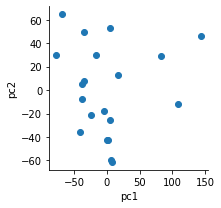

In [301]:
sn.FacetGrid(principal_df).map(plt.scatter, 'pc1', 'pc2').add_legend()
plt.show()

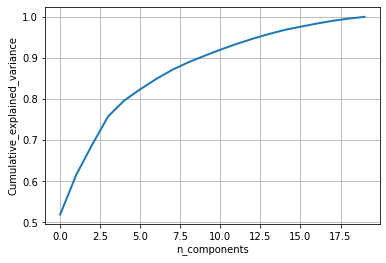

In [190]:
pca.n_components = 20

pca_data = pca.fit_transform(scaled_data)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

### LDA

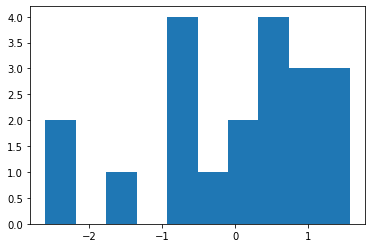

In [230]:
scaled_data_for_lda = scaled_data.T

##add a column for which it's belongs to class of data wither happy(1) or sad(0)
emotion_list = np.array([])
for each_img in os.listdir(directory):
    if(emotion_extract(each_img) == 1):
        emotion_list = np.append(emotion_list, [1])
    else:
        emotion_list = np.append(emotion_list, [0])

scaled_data_for_lda["10201"] = emotion_list
# scaled_data_for_lda

sampled_data_for_lda = scaled_data_for_lda.drop("10201", axis=1)

lda = LinearDiscriminantAnalysis(n_components=1)
LDA = lda.fit_transform(sampled_data_for_lda, scaled_data_for_lda['10201'])
# LPC = pd.DataFrame(LDA,columns=['pc1'])
# sn.FacetGrid(LPC).map(plt.scatter, 'pc1').add_legend()
# plt.show()
# LDA
plt.hist(LDA)
plt.show()

### PCA & LDA on Test data

### Q5 Signal processing - create spectogram for audio file

In [257]:
audio_directory = "/home/supriya/Documents/Assignment/MLSP/speechFiles/"

### Plotting 3 audio files

In [251]:
def plot_audio(audio_file):
    sample_rate, audio_data = read(audio_file)
    data_size = len(audio_data)
    plt.figure(figsize=(20,3))
    plt.plot(audio_data)
    plt.xticks(np.arange(0,data_size,sample_rate),
            np.arange(0,data_size/sample_rate,1))
    plt.ylabel("Amplitude")
    plt.xlabel("Time (second)")
    plt.title("The total length of time series = {} sec, sample_rate = {}".format(data_size/sample_rate, sample_rate))
    plt.show()

In [285]:
from IPython.display import Audio
Audio(audio_directory+"/"+"noise.wav", rate=16000)

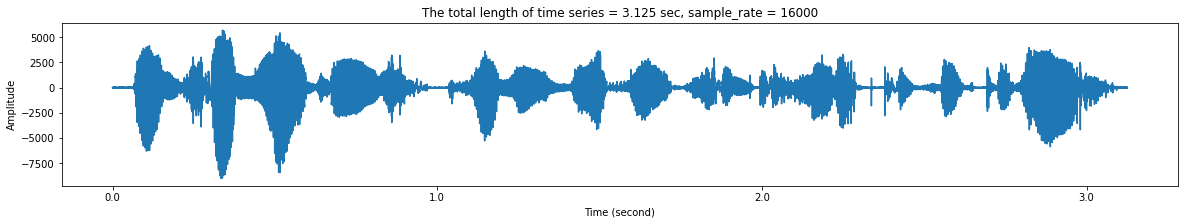

In [252]:
plot_audio(audio_directory+"/"+"clean.wav")

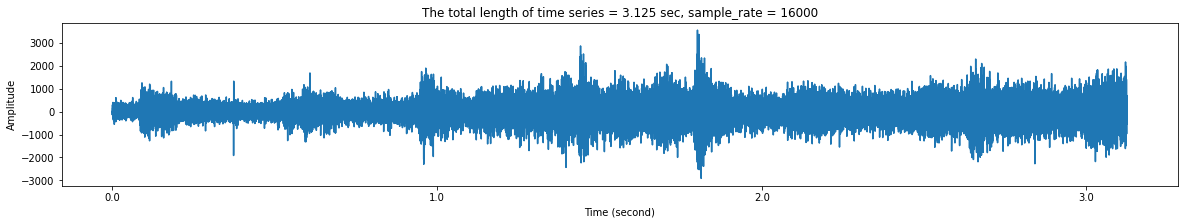

In [253]:
plot_audio(audio_directory+"/"+"noise.wav")

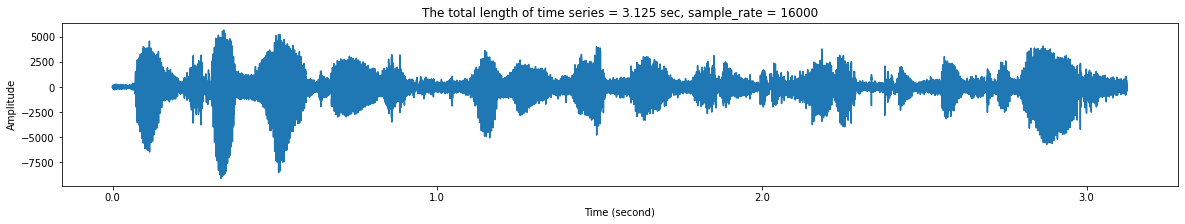

In [254]:
plot_audio(audio_directory+"/"+"noisy.wav")

### DFT of the files

In [ ]:
def get_xn(Xs,n):
    '''
    calculate the Fourier coefficient X_n of 
    Discrete Fourier Transform (DFT)
    '''
    L  = len(Xs)
    ks = np.arange(0,L,1)
    xn = np.sum(Xs*np.exp((1j*2*np.pi*ks*n)/L))/L
    return(xn)

def get_xns(adata):
    '''
    Compute Fourier coefficients only up to the Nyquest Limit Xn, n=1,...,L/2
    and multiply the absolute value of the Fourier coefficients by 2, 
    to account for the symetry of the Fourier coefficients above the Nyquest Limit. 
    '''
    mag = []
    asize = len(adata)
    for n in range(int(asize/2)): # Nyquest Limit
        mag.append(np.abs(get_xn(adata,n))*2)
    return(mag)

afile = audio_directory+"/"+"clean.wav"
sample_r, aud_data = read(afile)
aud_data1 = aud_data.tolist()
DFT_list = get_xns(aud_data1)
DFT_list

#CAUTION(CPU load) - !!!! DFT will take time to calculate !!!!

In [ ]:
afile = audio_directory+"/"+"noisy.wav"
sample_r, data = read(afile)
data = data.tolist()
data

KeyboardInterrupt: 

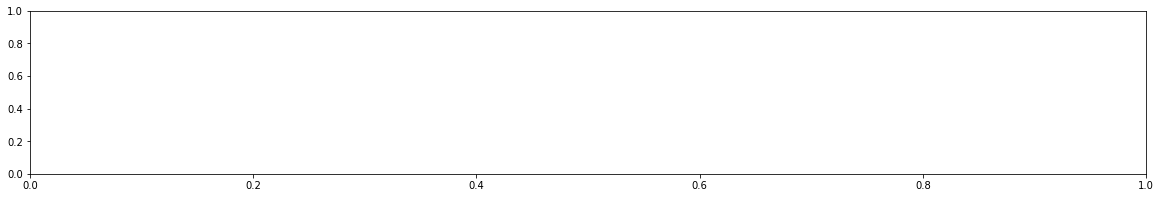

In [265]:
# the number of points to label along xaxis
# Nxlim = 10

plt.figure(figsize=(20,3))
plt.plot(DFT)
plt.xlabel("Frequency (k)")
plt.title("Two-sided frequency plot")
plt.ylabel("|Fourier Coefficient|")
plt.show()

In [266]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

def get_signal_Hz(Hz,sample_rate,length_ts_sec):
    ## 1 sec length time series with sampling rate 
    ts1sec = list(np.linspace(0,np.pi*2*Hz,sample_rate))
    ## 1 sec length time series with sampling rate 
    ts = ts1sec*length_ts_sec
    return(list(np.sin(ts)))

sample_rate   = 4000
length_ts_sec = 3
## --------------------------------- ##
## 3 seconds of "digit 1" sound
## Pressing digit 2 buttom generates 
## the sine waves at frequency 
## 697Hz and 1209Hz.
## --------------------------------- ##
ts1  = np.array(get_signal_Hz(697, sample_rate,length_ts_sec)) 
ts1 += np.array(get_signal_Hz(1209,sample_rate,length_ts_sec))
ts1  = list(ts1)

## -------------------- ##
## 2 seconds of silence
## -------------------- ##
ts_silence = [0]*sample_rate*1

## --------------------------------- ##
## 3 seconds of "digit 2" sounds 
## Pressing digit 2 buttom generates 
## the sine waves at frequency 
## 697Hz and 1336Hz.
## --------------------------------- ##
ts2  = np.array(get_signal_Hz(697, sample_rate,length_ts_sec)) 
ts2 += np.array(get_signal_Hz(1336,sample_rate,length_ts_sec))
ts2  = list(ts2)

## -------------------- ##
## Add up to 7 seconds
## ------------------- ##
ts = ts1 + ts_silence  + ts2

In [292]:
def get_xn(Xs,n):
    '''
    calculate the Fourier coefficient X_n of 
    Discrete Fourier Transform (DFT)
    '''
    L  = len(Xs)
    ks = np.arange(0,L,1)
    xn = np.sum(Xs*np.exp((1j*2*np.pi*ks*n)/L))/L
    return(xn)

def get_xns(ts):
    '''
    Compute Fourier coefficients only up to the Nyquest Limit Xn, n=1,...,L/2
    and multiply the absolute value of the Fourier coefficients by 2, 
    to account for the symetry of the Fourier coefficients above the Nyquest Limit. 
    '''
    mag = []
    L = len(ts)
    for n in range(int(L/2)): # Nyquest Limit
        mag.append(np.abs(get_xn(ts,n))*2)
    return(mag)
mag = get_xns(ts)

KeyboardInterrupt: 

### Rough work

In [211]:
# scaled_data_for_lda[['10201']].shape
sampled_data_for_lda = scaled_data_for_lda.drop("10201", axis=1)
sampled_data_for_lda

,0,1,2,3,4,5,6,7,8,9,...,10191,10192,10193,10194,10195,10196,10197,10198,10199,10200
0,-0.500982,-0.251456,-0.092667,0.179543,0.315648,0.338333,0.338333,0.361017,0.451754,0.474438,...,-0.841245,-0.818561,-0.750508,-0.750508,-0.637088,-0.614403,-0.682456,-0.682456,-0.773193,-0.750508
1,-0.012992,0.141998,0.210883,0.451980,0.641413,0.761961,0.830846,1.003058,1.175270,1.278597,...,-0.460743,-0.460743,-0.495186,-0.512407,-0.564070,-0.632955,-0.650176,-0.667398,-0.667398,-0.667398
2,-1.733260,-1.539925,-1.346590,-1.180874,-0.959920,-0.711346,-0.518011,-0.490392,-0.407534,-0.379915,...,-0.407534,-0.435153,-0.573250,-0.628488,-0.600869,-0.518011,-0.490392,-0.518011,-0.573250,-0.711346
3,-1.792243,-1.614708,-1.377993,-1.022922,-0.667850,-0.391683,-0.273326,-0.135243,-0.076064,0.022567,...,-0.884838,-1.062374,-1.062374,-1.003195,-0.963743,-0.648124,-0.036612,0.929972,2.192449,2.744782
4,0.450280,0.595412,0.653465,0.769570,0.798597,0.769570,0.798597,0.798597,0.798597,0.827623,...,-0.188300,-0.275379,-0.391485,-0.391485,-0.275379,-0.275379,-0.246353,-0.072195,-0.014142,-0.014142
5,0.553086,0.570255,0.535917,0.450075,0.467243,0.553086,0.553086,0.535917,0.570255,0.553086,...,-1.026420,-0.803229,0.158209,1.754884,3.008188,3.059694,3.059694,3.059694,3.059694,3.059694
6,-0.258351,0.091038,0.484100,0.724304,0.789815,0.855325,0.920835,0.942672,0.898999,0.898999,...,-0.476719,-0.476719,-0.498556,-0.476719,-0.454882,-0.411208,-0.389372,-0.389372,-0.367535,-0.258351
7,-1.504848,-1.422926,-1.320523,-1.136197,-0.849469,-0.542259,-0.276011,-0.091686,0.072159,0.133601,...,-0.562740,-0.501298,-0.398895,-0.173608,0.072159,0.727539,2.918964,3.451460,3.451460,3.451460
8,0.108142,0.162556,0.253246,0.289522,0.362074,0.380212,0.452764,0.561592,0.634144,0.652282,...,-0.363447,-0.363447,-0.399723,-0.399723,-0.290895,-0.163928,0.035590,0.271384,0.416488,0.162556
9,-1.498031,-1.271710,-1.004239,-0.798492,-0.551596,-0.407573,-0.325274,-0.201826,-0.098953,-0.037228,...,-1.107112,-1.107112,-1.086537,-1.148262,-1.209986,-1.230560,-1.209986,-1.189411,-1.209986,-1.209986


In [115]:
img2mat = img.imread(directory + '/' + "subject12.sad.gif" ) #image to matrix form
imgVec = img2mat.reshape(10201,1) #reshape to a vector of size 10201
# imgVec
data = pd.DataFrame()
#create dataframe and load the vector as column of it. also append the labels(happy(1)/sad(0)) of it at the end
df1 = pd.DataFrame(imgVec)
data = pd.concat([df1,data],axis=1, ignore_index = True)
# data = data.T
# df.insert(imgVec.T)
# img2mat, imgVec = 0, 0
img2mat = img.imread(directory + '/' + "subject10.happy.gif" ) #image to matrix form
imgVec = img2mat.reshape(10201,1) #reshape to a vector of size 10201
# imgVec

#create dataframe and load the vector as column of it. also append the labels(happy(1)/sad(0)) of it at the end
# df.insert(1,1,imgVec)
# df.T
df2 = pd.DataFrame(imgVec)
data = pd.concat([data,df2],axis=1, ignore_index = True)
data

# emotion_list = np.array(0)
for each_img in os.listdir(directory):
    if(emotion_extract(each_img) == 1):
        data = pd.concat()
data = pd.concat([data, emotion_list],axis=1, ignore_index = True)
data

TypeError: cannot concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid